<span style="font-family: 'Times New Roman', serif; font-size: 25px;">

$$\text{ИМПОРТ БИБЛИОТЕК}$$

</span>

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, precision_recall_curve, auc
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from imblearn.over_sampling import SMOTENC

<span style="font-family: 'Times New Roman', serif; font-size: 20px;">

$$\text{ЧТЕНИЕ И ПЕРВИЧНЫЙ ПРОСМОТР ДАННЫХ}$$

$$\text{Данные из Google Analytics по сайту "СберАвтоподписка"}$$

</span>

In [4]:
data = pd.read_csv("data/ga_hits.csv")

In [68]:
data.head()

,session_id,hit_date,hit_time,hit_number,hit_type,hit_referer,hit_page_path,event_category,event_action,event_label,event_value
0,5639623078712724064.1640254056.1640254056,2021-12-23,597864.0,30,event,NaN,sberauto.com/cars?utm_source_initial=google&ut...,quiz,quiz_show,NaN,NaN
1,7750352294969115059.1640271109.1640271109,2021-12-23,597331.0,41,event,NaN,sberauto.com/cars/fiat?city=1&city=18&rental_c...,quiz,quiz_show,NaN,NaN
2,885342191847998240.1640235807.1640235807,2021-12-23,796252.0,49,event,NaN,sberauto.com/cars/all/volkswagen/polo/e994838f...,quiz,quiz_show,NaN,NaN
3,142526202120934167.1640211014.1640211014,2021-12-23,934292.0,46,event,NaN,sberauto.com/cars?utm_source_initial=yandex&ut...,quiz,quiz_show,NaN,NaN
4,3450086108837475701.1640265078.1640265078,2021-12-23,768741.0,79,event,NaN,sberauto.com/cars/all/mercedes-benz/cla-klasse...,quiz,quiz_show,NaN,NaN


In [6]:
data_s = pd.read_csv("data/ga_sessions.csv")

C:\Users\nosen\AppData\Local\Temp\ipykernel_34332\3016289122.py:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  data_s = pd.read_csv("ga_sessions.csv")


In [7]:
data_s.head()

,session_id,client_id,visit_date,visit_time,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,utm_keyword,device_category,device_os,device_brand,device_model,device_screen_resolution,device_browser,geo_country,geo_city
0,9055434745589932991.1637753792.1637753792,2108382700.163776,2021-11-24,14:36:32,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,Android,Huawei,NaN,360x720,Chrome,Russia,Zlatoust
1,905544597018549464.1636867290.1636867290,210838531.163687,2021-11-14,08:21:30,1,MvfHsxITijuriZxsqZqt,cpm,FTjNLDyTrXaWYgZymFkV,xhoenQgDQsgfEPYNPwKO,IGUCNvHlhfHpROGclCit,mobile,Android,Samsung,NaN,385x854,Samsung Internet,Russia,Moscow
2,9055446045651783499.1640648526.1640648526,2108385331.164065,2021-12-28,02:42:06,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,Android,Huawei,NaN,360x720,Chrome,Russia,Krasnoyarsk
3,9055447046360770272.1622255328.1622255328,2108385564.162225,2021-05-29,05:00:00,1,kjsLglQLzykiRbcDiGcD,cpc,NaN,NOBKLgtuvqYWkXQHeYWM,NaN,mobile,NaN,Xiaomi,NaN,393x786,Chrome,Russia,Moscow
4,9055447046360770272.1622255345.1622255345,2108385564.162225,2021-05-29,05:00:00,2,kjsLglQLzykiRbcDiGcD,cpc,NaN,NaN,NaN,mobile,NaN,Xiaomi,NaN,393x786,Chrome,Russia,Moscow


In [72]:
data_s.shape

(1860042, 18)

In [73]:
data.shape

(15726470, 11)

In [74]:
data.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15726470 entries, 0 to 15726469
Data columns (total 11 columns):
 #   Column          Non-Null Count     Dtype  
---  ------          --------------     -----  
 0   session_id      15726470 non-null  object 
 1   hit_date        15726470 non-null  object 
 2   hit_time        6566148 non-null   float64
 3   hit_number      15726470 non-null  int64  
 4   hit_type        15726470 non-null  object 
 5   hit_referer     9451666 non-null   object 
 6   hit_page_path   15726470 non-null  object 
 7   event_category  15726470 non-null  object 
 8   event_action    15726470 non-null  object 
 9   event_label     11966286 non-null  object 
 10  event_value     0 non-null         float64
dtypes: float64(2), int64(1), object(8)
memory usage: 1.3+ GB


In [75]:
data_s.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1860042 entries, 0 to 1860041
Data columns (total 18 columns):
 #   Column                    Non-Null Count    Dtype 
---  ------                    --------------    ----- 
 0   session_id                1860042 non-null  object
 1   client_id                 1860042 non-null  object
 2   visit_date                1860042 non-null  object
 3   visit_time                1860042 non-null  object
 4   visit_number              1860042 non-null  int64 
 5   utm_source                1859945 non-null  object
 6   utm_medium                1860042 non-null  object
 7   utm_campaign              1640439 non-null  object
 8   utm_adcontent             1524427 non-null  object
 9   utm_keyword               777981 non-null   object
 10  device_category           1860042 non-null  object
 11  device_os                 789904 non-null   object
 12  device_brand              1492864 non-null  object
 13  device_model              16338 non-null  

<span style="font-family: 'Times New Roman', serif; font-size: 18px;">

$$\text{ОПИСАНИЕ ДАННЫХ}$$

**GA Hits (ga\_hits.pkl)**
Одна строка = одно событие в рамках одного визита на сайт
Колонки:  
- session\_id — ID визита  
- hit\_date — дата события  
- hit\_time — время события  
- hit\_number — порядковый номер события в рамках сессии  
- hit\_type — тип события  
- hit\_referer — источник события  
- hit\_page\_path — страница события  
- event\_category — тип действия  
- event\_action — действие  
- event\_label — тег действия  
- event\_value — значение результата действия  

**GA Sessions (ga\_sessions.pkl)**
Одна строка = один визит на сайт
Колонки:  
- session\_id — ID визита  
- client\_id — ID посетителя  
- visit\_date — дата визита  
- visit\_time — время визита  
- visit\_number — порядковый номер визита клиента  
- utm\_source — канал привлечения  
- utm\_medium — тип привлечения  
- utm\_campaign — рекламная кампания  
- utm\_keyword — ключевое слово  
- device\_category — тип устройства  
- device\_os — ОС устройства  
- device\_brand — марка устройства  
- device\_model — модель устройства  
- device\_screen\_resolution — разрешение экрана  
- device\_browser — браузер  
- geo\_country — страна  
- geo\_city — город

</span>

<span style="font-family: 'Times New Roman', serif; font-size: 15px;">

$$\text{ГЛОССАРИЙ}$$

**Целевое действие** — события типа «Оставить заявку» и «Заказать звонок»  
(ga\_hits.event\_action in ['sub\_car\_claim\_click', 'sub\_car\_claim\_submit\_click', 'sub\_open\_dialog\_click', 'sub\_custom\_question\_submit\_click', 'sub\_call\_number\_click', 'sub\_callback\_submit\_click', 'sub\_submit\_success', 'sub\_car\_request\_submit\_click'])


**Органический трафик** — все визиты с ga\_sessions.utm\_medium in ('organic', 'referral', '(none'))

**Платный трафик** — весь неорганический трафик

**Информация про марку и модель авто** — содержится в ga\_hits.hit\_page\_path

**Реклама в социальных сетях** — все визиты с ga\_sessions.utm\_source in ('QxAxdyPLuQMEcrdZWdWb', 'MvHIsxITijuriZxsqZqt', 'ISrKoXQCxqqYvAZiCvjs', 'IZEXUFLARCUMynmHNBGo', 'PlbkrSYoHuZBWfYjYnfw', 'gVRrcxIDQubJiljoTbGm')

</span>

In [61]:
target_action = set(['sub_car_claim_click', 'sub_car_claim_submit_click',
'sub_open_dialog_click', 'sub_custom_question_submit_click',
'sub_call_number_click', 'sub_callback_submit_click', 'sub_submit_success',
'sub_car_request_submit_click'])

<span style="font-family: 'Times New Roman', serif; font-size: 30px;">

$$\text{Инженерия признаков}$$
</span>

<span style="font-family: 'Times New Roman', serif; font-size: 15px;">

группировка и агрегация признаков может идти долго из за большого объема данных, так же хранение всех таблиц может занимать много памяти и вызывать ошибку поэтому можно сразу начать работу с загрузки готовых фичей со строки "user_features = pd.read_csv('data/user_features.csv')"
</span>


In [76]:
data["event_action"] = data["event_action"].apply(lambda x: 1 if x in target_action else 0)

In [77]:
session_sums = data.groupby('session_id')['event_action'].sum().reset_index()
session_sums['has_events'] = (session_sums['event_action'] > 0).astype(int)

In [78]:
df_merged = data.merge(session_sums[['session_id', 'has_events']], on='session_id')

In [79]:
df_merged.head()

,session_id,hit_date,hit_time,hit_number,hit_type,hit_referer,hit_page_path,event_category,event_action,event_label,event_value,has_events
0,5639623078712724064.1640254056.1640254056,2021-12-23,597864.0,30,event,NaN,sberauto.com/cars?utm_source_initial=google&ut...,quiz,0,NaN,NaN,0
1,5639623078712724064.1640254056.1640254056,2021-12-23,290095.0,12,event,NaN,sberauto.com/cars/all/kia/seltos/20f30855?utm_...,card_web,0,NaN,NaN,0
2,5639623078712724064.1640254056.1640254056,2021-12-23,294857.0,18,event,NaN,sberauto.com/cars/all/volkswagen/tiguan/0208cd...,card_web,0,NaN,NaN,0
3,5639623078712724064.1640254056.1640254056,2021-12-23,295591.0,20,event,NaN,sberauto.com/cars/all/volkswagen/tiguan/0208cd...,card_web,0,NaN,NaN,0
4,5639623078712724064.1640254056.1640254056,2021-12-23,290039.0,8,event,NaN,sberauto.com/cars/all/kia/seltos/20f30855?utm_...,card_web,0,NaN,NaN,0


In [80]:
result_df = data_s.merge(df_merged, on='session_id')

MemoryError: Unable to allocate 840. MiB for an array with shape (7, 15726470) and data type object

In [17]:
result_df.head()

,session_id,client_id,visit_date,visit_time,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,utm_keyword,...,hit_time,hit_number,hit_type,hit_referer,hit_page_path,event_category,event_action,event_label,event_value,has_events
0,9055434745589932991.1637753792.1637753792,2108382700.163776,2021-11-24,14:36:32,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,...,3665.0,3,event,NaN,podpiska.sberauto.com/,sub_page_view,0,NaN,NaN,0
1,9055434745589932991.1637753792.1637753792,2108382700.163776,2021-11-24,14:36:32,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,...,46592.0,4,event,NaN,podpiska.sberauto.com/,sub_button_click,0,vodKSlUobUWTVlgsJqdI,NaN,0
2,905544597018549464.1636867290.1636867290,210838531.163687,2021-11-14,08:21:30,1,MvfHsxITijuriZxsqZqt,cpm,FTjNLDyTrXaWYgZymFkV,xhoenQgDQsgfEPYNPwKO,IGUCNvHlhfHpROGclCit,...,921.0,3,event,NaN,podpiska.sberauto.com/,sub_page_view,0,NaN,NaN,0
3,9055446045651783499.1640648526.1640648526,2108385331.164065,2021-12-28,02:42:06,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,...,84155.0,10,event,NaN,sberauto.com/cars?utm_source_initial=sbol&utm_...,search_form,0,KWTCzSIXzoqUWjfUQMgP,NaN,0
4,9055446045651783499.1640648526.1640648526,2108385331.164065,2021-12-28,02:42:06,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,...,102979.0,13,event,NaN,sberauto.com/cars?utm_source_initial=sbol&utm_...,search_form,0,CBqnBQaKoQUyWJhLcxxN,NaN,0


In [18]:
result_df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15685219 entries, 0 to 15685218
Data columns (total 29 columns):
 #   Column                    Non-Null Count     Dtype  
---  ------                    --------------     -----  
 0   session_id                15685219 non-null  object 
 1   client_id                 15685219 non-null  object 
 2   visit_date                15685219 non-null  object 
 3   visit_time                15685219 non-null  object 
 4   visit_number              15685219 non-null  int64  
 5   utm_source                15684519 non-null  object 
 6   utm_medium                15685219 non-null  object 
 7   utm_campaign              13486346 non-null  object 
 8   utm_adcontent             12852801 non-null  object 
 9   utm_keyword               6480392 non-null   object 
 10  device_category           15685219 non-null  object 
 11  device_os                 6526837 non-null   object 
 12  device_brand              11739344 non-null  object 
 13  device_mod

In [19]:
null_colums = result_df.isnull().sum()

In [20]:
null_colums

session_id                         0
client_id                          0
visit_date                         0
visit_time                         0
visit_number                       0
utm_source                       700
utm_medium                         0
utm_campaign                 2198873
utm_adcontent                2832418
utm_keyword                  9204827
device_category                    0
device_os                    9158382
device_brand                 3945875
device_model                15562932
device_screen_resolution           0
device_browser                     0
geo_country                        0
geo_city                           0
hit_date                           0
hit_time                     9160203
hit_number                         0
hit_type                           0
hit_referer                  6235498
hit_page_path                      0
event_category                     0
event_action                       0
event_label                  3727682
e

In [74]:
result_df = result_df.drop(['utm_keyword', 'device_os', 'device_model', 'hit_time', 'hit_referer', 'event_value', 'hit_page_path', 'event_category', 'hit_date', 'hit_number', 'hit_type', 'hit_page_path', 'event_label', 'event_action'],
                           axis=1)
result_df.dropna(inplace = True)

result_df['visit_hour'] = result_df['visit_time'].str[:2].astype(int)

result_df['time_of_day'] = result_df['visit_hour'].apply(lambda h: 'night' if h < 6 else 'morning' if h < 12 else 'afternoon' if h < 18 else 'evening')

NameError: name 'result_df' is not defined

In [22]:
result_df.isnull().sum()

session_id                  0
client_id                   0
visit_date                  0
visit_time                  0
visit_number                0
utm_source                  0
utm_medium                  0
utm_campaign                0
utm_adcontent               0
device_category             0
device_brand                0
device_screen_resolution    0
device_browser              0
geo_country                 0
geo_city                    0
has_events                  0
visit_hour                  0
time_of_day                 0
dtype: int64

In [23]:
result_df.columns

Index(['session_id', 'client_id', 'visit_date', 'visit_time', 'visit_number',
       'utm_source', 'utm_medium', 'utm_campaign', 'utm_adcontent',
       'device_category', 'device_brand', 'device_screen_resolution',
       'device_browser', 'geo_country', 'geo_city', 'has_events', 'visit_hour',
       'time_of_day'],
      dtype='object')

In [24]:
result_df.to_csv('result_df.csv', index=False)

In [2]:
result_df = pd.read_csv('result_df.csv')

In [5]:
user_features = result_df.groupby('client_id').agg(
    total_sessions=('session_id', 'nunique'),
    max_visit_number=('visit_number', 'max'),
    most_common_source=('utm_source', lambda x: x.mode()[0]),
    most_common_medium=('utm_medium', lambda x: x.mode()[0]),
    most_common_campaign=('utm_campaign', lambda x: x.mode()[0]),
    most_common_adcontent=('utm_adcontent', lambda x: x.mode()[0]),
    most_common_device=('device_category', lambda x: x.mode()[0]),
    most_common_brand=('device_brand', lambda x: x.mode()[0]),
    most_common_browser=('device_browser', lambda x: x.mode()[0]),
    most_common_country=('geo_country', lambda x: x.mode()[0]),
    most_common_city=('geo_city', lambda x: x.mode()[0]),
    has_converted=('has_events', 'max'),
    first_visit=('visit_date', 'min'),
    last_visit=('visit_date', 'max'),
    unique_visit_days=('visit_date', 'nunique'),
    most_common_time_of_day=('time_of_day', lambda x: x.mode()[0]),
    avg_visit_hour=('visit_hour', 'mean'),
    most_common_hour=('visit_hour', lambda x: x.mode()[0])
).reset_index()

In [9]:
user_features = user_features.drop('client_id', axis = 1)

In [6]:
user_features.to_csv('user_features.csv', index=False)

NameError: name 'user_features' is not defined

In [2]:
user_features = pd.read_csv('data/user_features.csv')

In [3]:
df_prepared = user_features.drop_duplicates()

In [4]:
df_prepared.head()

,total_sessions,max_visit_number,most_common_source,most_common_medium,most_common_campaign,most_common_adcontent,most_common_device,most_common_brand,most_common_browser,most_common_country,most_common_city,has_converted,first_visit,last_visit,unique_visit_days,most_common_time_of_day,avg_visit_hour,most_common_hour
0,1,1,ZpYIoDJMcFzVoPFsHGJL,push,sbJRYgVfvcnqKJNDDYIr,JNHcPlZPxEMWDnRiyoBf,mobile,Huawei,Chrome,Russia,Moscow,0,2021-12-21,2021-12-21,1,afternoon,14.0,14
1,1,1,MvfHsxITijuriZxsqZqt,cpm,FTjNLDyTrXaWYgZymFkV,PkybGvWbaqORmxjNunqZ,mobile,Samsung,Chrome,Russia,Saint Petersburg,0,2021-09-08,2021-09-08,1,afternoon,15.0,15
2,1,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,JNHcPlZPxEMWDnRiyoBf,mobile,Apple,Safari,Russia,Moscow,0,2021-07-25,2021-07-25,1,afternoon,13.0,13
3,1,1,fDLlAcSmythWSCVMvqvL,(none),LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,mobile,Apple,Safari,Russia,Moscow,0,2021-05-24,2021-05-24,1,afternoon,12.0,12
4,1,1,ZpYIoDJMcFzVoPFsHGJL,push,sbJRYgVfvcnqKJNDDYIr,JNHcPlZPxEMWDnRiyoBf,mobile,Apple,Safari,Russia,Moscow,0,2021-12-21,2021-12-21,1,afternoon,14.0,14


<span style="font-family: 'Times New Roman', serif; font-size: 20px;">

$$\text{Анализ целевой переменной}$$

</span>

In [5]:
target = "has_converted"

In [6]:
class_counts = df_prepared[target].value_counts()

In [7]:
class_counts

0    637163
1     28094
Name: has_converted, dtype: int64

In [8]:
value_0 = class_counts[0]
value_1 = class_counts[1]

In [9]:
print("Класс 1 составляет,", (value_1 / (value_1 + value_0)),"%", "от всех данных -> дисбаланс класса 1")

Класс 1 составляет, 0.04223029596080913 % от всех данных -> дисбаланс класса 1


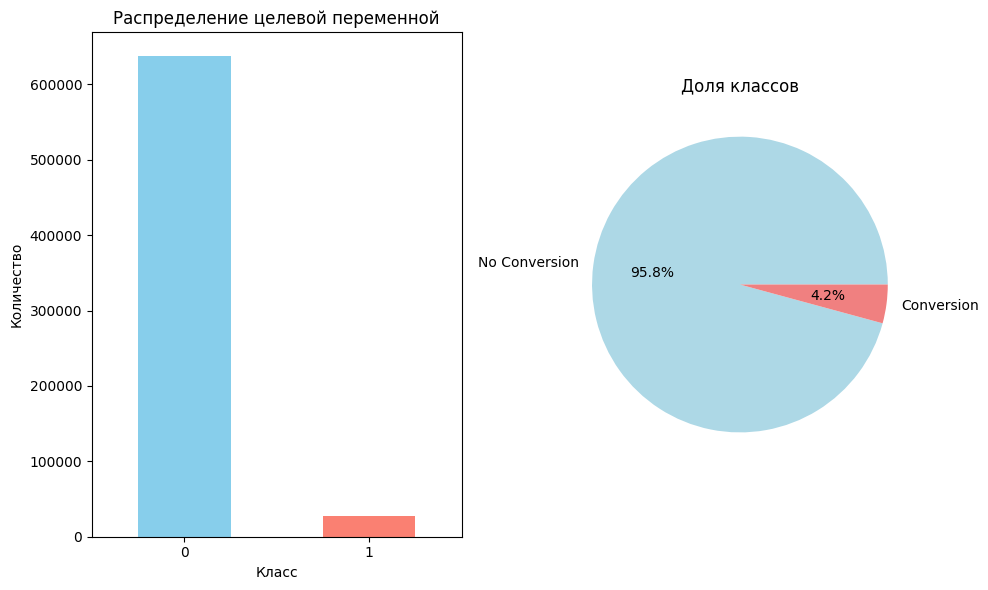

In [10]:
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
class_counts.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Распределение целевой переменной')
plt.xlabel('Класс')
plt.ylabel('Количество')
plt.xticks(rotation=0)

plt.subplot(1, 2, 2)
plt.pie(class_counts.values, labels=['No Conversion', 'Conversion'], 
        autopct='%1.1f%%', colors=['lightblue', 'lightcoral'])
plt.title('Доля классов')

plt.tight_layout()
plt.show()

In [11]:
y = df_prepared[target]
X = df_prepared.drop(target, axis = 1)

In [17]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 665257 entries, 0 to 665256
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   total_sessions           665257 non-null  int64  
 1   max_visit_number         665257 non-null  int64  
 2   most_common_source       665257 non-null  object 
 3   most_common_medium       665257 non-null  object 
 4   most_common_campaign     665257 non-null  object 
 5   most_common_adcontent    665257 non-null  object 
 6   most_common_device       665257 non-null  object 
 7   most_common_brand        665257 non-null  object 
 8   most_common_browser      665257 non-null  object 
 9   most_common_country      665257 non-null  object 
 10  most_common_city         665257 non-null  object 
 11  first_visit              665257 non-null  object 
 12  last_visit               665257 non-null  object 
 13  unique_visit_days        665257 non-null  int64  
 14  most

<span style="font-family: 'Times New Roman', serif; font-size: 20px;">

$$\text{Кодирование категориальных переменных и стандартизация числовых}$$

</span>

In [18]:
categorical_columns = X.select_dtypes(include=['object']).columns.tolist()
numeric_colums = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

In [20]:
def prepare_data(X, numeric_colums, categorical_columns):
    
    X_prepared = X.copy()
    label_encoders = {}
    
    for col in categorical_columns:
        le = LabelEncoder()
        X_prepared[col] = le.fit_transform(X_prepared[col].astype(str))
        label_encoders[col] = le
    
    scaler = StandardScaler()
    X_prepared[numeric_colums] = scaler.fit_transform(X_prepared[numeric_colums])
    
    return X_prepared, label_encoders, scaler

X_encoded, encoders, fitted_scaler = prepare_data(
    X, 
    numeric_colums, 
    categorical_columns
)

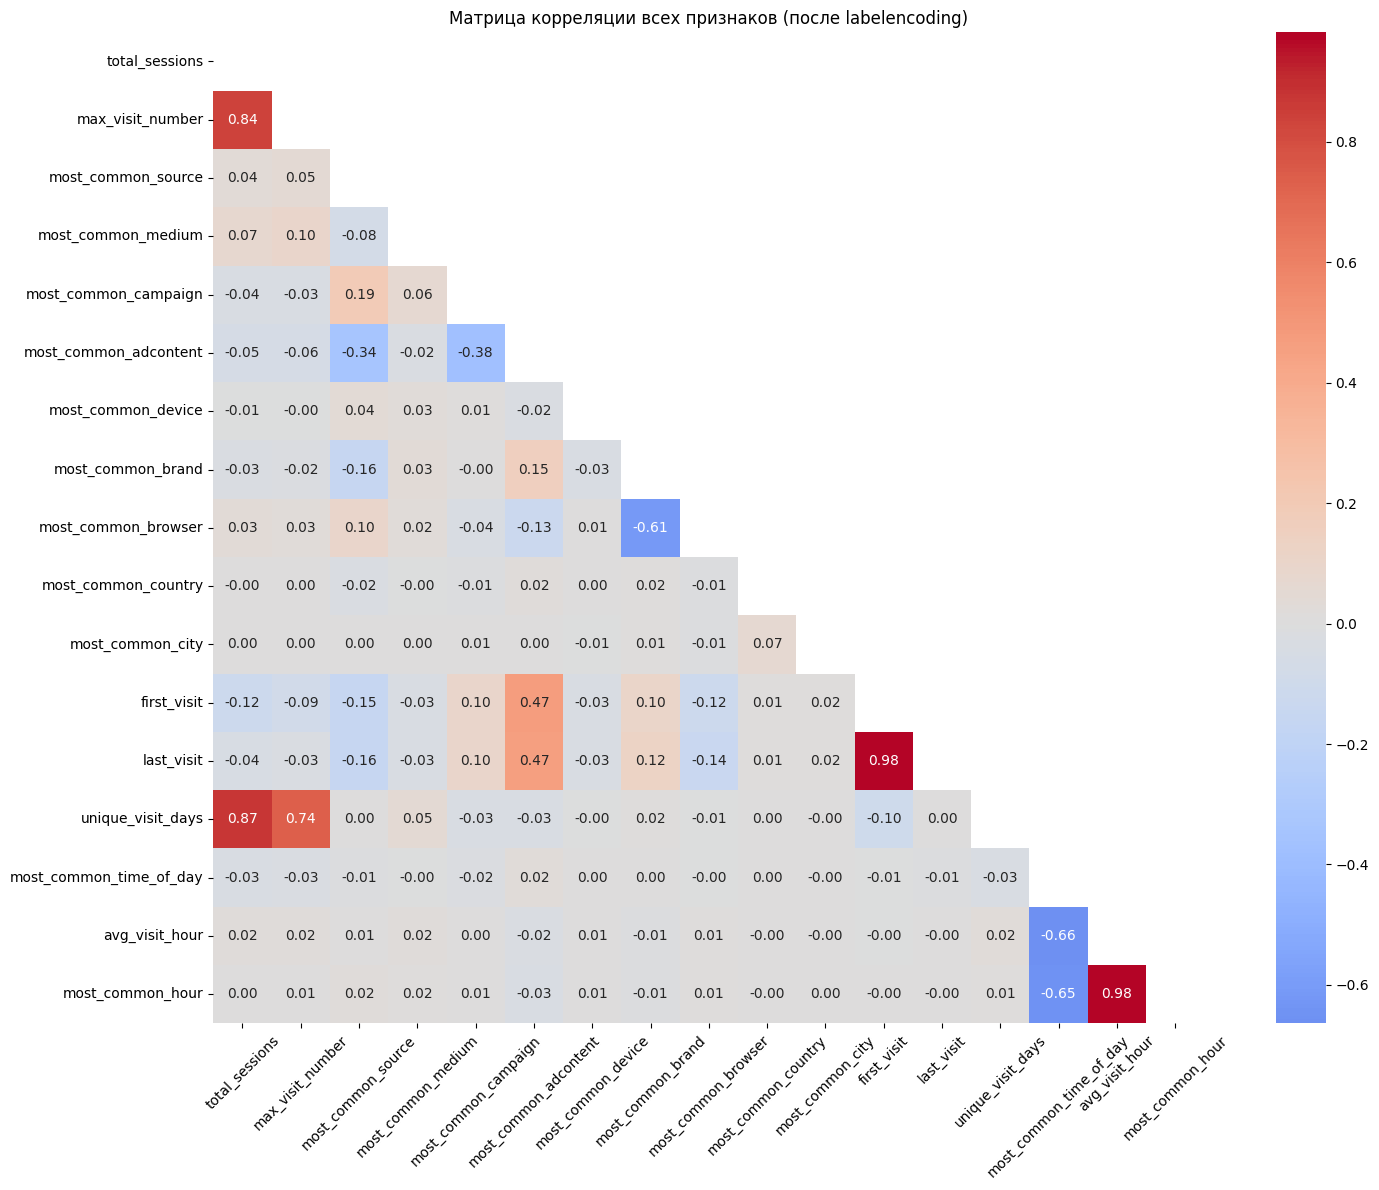

In [73]:
plt.figure(figsize=(16, 12))
correlation_matrix = X_encoded.corr()

mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

sns.heatmap(correlation_matrix, 
            mask=mask,
            annot=True, 
            fmt='.2f', 
            cmap='coolwarm',
            center=0,
            square=True)
plt.title('Матрица корреляции всех признаков (после labelencoding)')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

<span style="font-family: 'Times New Roman', serif; font-size: 20px;">

$$\text{Разделение на тренировочную, валидационную, тестовую выборки с стратификацией}$$


</span>

In [25]:
X_temp, X_test, y_temp, y_test = train_test_split(
    X_encoded, y, 
    test_size=0.2, 
    random_state=42,
    stratify=y
)

In [26]:
X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, 
    test_size=0.25,
    random_state=42,
    stratify=y_temp
)

<span style="font-family: 'Times New Roman', serif; font-size: 20px;">

в качестве тестируемых моделей выберем модели градиентного бустинга и случайного леса так как они эффективно могут работать с категориальными данными
закодированными с помощью labelencoder, другие модели требуют кодирования через onehotencoder но из за этого возрастает размерность данных и сложность
вычислений что вызывает ошибки по памяти и времени, так же они умеют эффективно работать с дисбалансом классов

</span>

In [27]:
models = {
    'Random Forest': RandomForestClassifier(
        class_weight='balanced',
        random_state=42,
        n_estimators=100,
        max_depth=10
    ),
    'XGBoost': XGBClassifier(
        scale_pos_weight=31,
        random_state=42,
        eval_metric='auc',
        early_stopping_rounds=50,
        max_depth=8,
    ),
    'LightGBM': LGBMClassifier(
        class_weight='balanced',
        random_state=42,
        eval_metric='auc',
        early_stopping_rounds=50,
        verbose=-1,
        max_depth=8
    ),
    'CatBoost': CatBoostClassifier(
        auto_class_weights='Balanced',
        random_state=42,
        eval_metric='AUC',
        verbose=False,
        max_depth=8
    )
}

<span style="font-family: 'Times New Roman', serif; font-size: 20px;">

выбор лучшей модели на одной и той же валидационной выборки

</span>

In [28]:
results = {}

for name, model in models.items():
        print(f"\n Обучение модели: {name}")
    
        if name == 'LightGBM':
            model.fit(X_train, y_train, 
                     eval_set=[(X_val, y_val)])
        
        elif name == 'CatBoost':
            model.fit(X_train, y_train, 
                     eval_set=[(X_val, y_val)],
                     early_stopping_rounds=50)
        
        elif name == 'XGBoost':
            model.fit(X_train, y_train,
                     eval_set=[(X_val, y_val)])
        
        else:
            model.fit(X_train, y_train)
        
        y_pred = model.predict(X_val)
        y_pred_proba = model.predict_proba(X_val)[:, 1]
        
        auc_roc = roc_auc_score(y_val, y_pred_proba)
        report = classification_report(y_val, y_pred, output_dict=True)
        cm = confusion_matrix(y_val, y_pred)
        
        results[name] = {
            'model': model,
            'auc_roc': auc_roc,
            'classification_report': report,
            'confusion_matrix': cm,
            'predictions': y_pred,
            'probabilities': y_pred_proba
        }


 Обучение модели: Random Forest

 Обучение модели: XGBoost
[0]	validation_0-auc:0.70793
[1]	validation_0-auc:0.71482
[2]	validation_0-auc:0.71570
[3]	validation_0-auc:0.71847
[4]	validation_0-auc:0.71975
[5]	validation_0-auc:0.72084
[6]	validation_0-auc:0.72157
[7]	validation_0-auc:0.72492
[8]	validation_0-auc:0.72503
[9]	validation_0-auc:0.72533
[10]	validation_0-auc:0.72627
[11]	validation_0-auc:0.72596
[12]	validation_0-auc:0.72585
[13]	validation_0-auc:0.72674
[14]	validation_0-auc:0.72715
[15]	validation_0-auc:0.72733
[16]	validation_0-auc:0.72775
[17]	validation_0-auc:0.72755
[18]	validation_0-auc:0.72785
[19]	validation_0-auc:0.72733
[20]	validation_0-auc:0.72751
[21]	validation_0-auc:0.72728
[22]	validation_0-auc:0.72706
[23]	validation_0-auc:0.72678
[24]	validation_0-auc:0.72666
[25]	validation_0-auc:0.72679
[26]	validation_0-auc:0.72649
[27]	validation_0-auc:0.72604
[28]	validation_0-auc:0.72641
[29]	validation_0-auc:0.72672
[30]	validation_0-auc:0.72640
[31]	validation_0-au

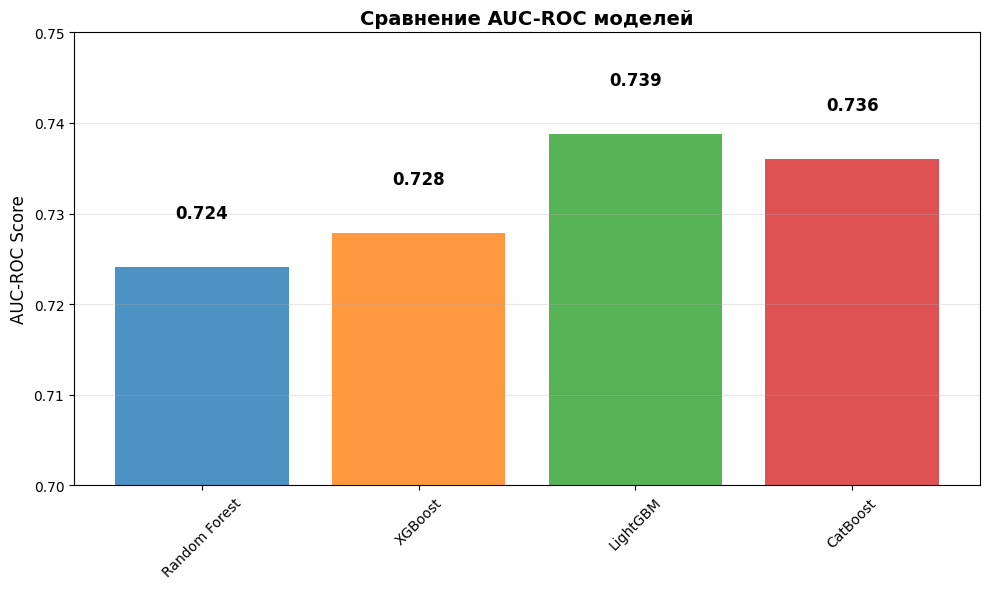

In [30]:
plt.figure(figsize=(10, 6))
models = list(results.keys())
auc_scores = [results[model]['auc_roc'] for model in models]

colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']
bars = plt.bar(models, auc_scores, color=colors, alpha=0.8)

# Добавляем подписи
for bar, score in zip(bars, auc_scores):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.005,
             f'{score:.3f}', ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.ylim(0.70, 0.75)
plt.ylabel('AUC-ROC Score', fontsize=12)
plt.title('Сравнение AUC-ROC моделей', fontsize=14, fontweight='bold')
plt.grid(axis='y', alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<span style="font-family: 'Times New Roman', serif; font-size: 20px;">

loghtgbm показала себя лучше всех на валидационной выборке, рандомно перберем гипер парамаетры в сетке что бы быстро найти подходящую размерность 

</span>

In [31]:
lgb_params = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [6, 8, 10, 12, 15],
    'learning_rate': [0.01, 0.05, 0.1, 0.15],
    'subsample': [0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.7, 0.8, 0.9, 1.0],
    'reg_alpha': [0, 0.1, 0.5, 1.0],
    'reg_lambda': [0, 0.1, 0.5, 1.0]}

lgb_base = LGBMClassifier(
    class_weight='balanced',
    random_state=42,
    verbose=-1)

lgb_search = RandomizedSearchCV(
    lgb_base,
    lgb_params,
    n_iter=15,
    scoring='roc_auc',
    cv=3,
    random_state=42,
    n_jobs=-1,
    verbose=1)

lgb_search.fit(X_train, y_train)

print(f"Лучшие параметры: {lgb_search.best_params_}")
print(f"Лучший ROC-AUC на кросс-валидации: {lgb_search.best_score_:.4f}")

Fitting 3 folds for each of 15 candidates, totalling 45 fits

📝 Настройка завершена!
Лучшие параметры: {'subsample': 0.8, 'reg_lambda': 0, 'reg_alpha': 0, 'n_estimators': 300, 'max_depth': 15, 'learning_rate': 0.05, 'colsample_bytree': 0.7}
Лучший ROC-AUC на кросс-валидации: 0.7369


<span style="font-family: 'Times New Roman', serif; font-size: 20px;">
ROC-AUC на валидации 0.7369, что показывает как хорошо модель хорошо отличает один класс от другого (0 от 1) 

создадим и обучим модель с лучшими гиперпараметрами на всех тренеровочных данных и посмотрим roc_auc на тестовых

</span>

In [32]:
best_params = lgb_search.best_params_
print(f"Лучшие параметры: {best_params}")

final_lgb = LGBMClassifier(
    **best_params,
    class_weight='balanced',
    random_state=42,
    verbose=-1
)

Лучшие параметры: {'subsample': 0.8, 'reg_lambda': 0, 'reg_alpha': 0, 'n_estimators': 300, 'max_depth': 15, 'learning_rate': 0.05, 'colsample_bytree': 0.7}


In [33]:
final_lgb.fit(X_temp, y_temp)
y_test_pred_final = final_lgb.predict(X_test)
y_pred_proba_final = final_lgb.predict_proba(X_test)[:, 1]

In [34]:
final_roc_auc = roc_auc_score(y_test, y_pred_proba_final)

In [35]:
print("Финальный roc_auc ", final_roc_auc)

Финальный roc_auc  0.7427793981740785


<span style="font-family: 'Times New Roman', serif; font-size: 20px;">

финальный roc_auc 0.7428 > 0.7369 больше чем на валидационной значит модель не переобучилась на полной тренеровочной выборке и имеет хорошую обобщающую способность
</span>

In [36]:
feature_importances_final = final_lgb.feature_importances_
importance_df_final = pd.DataFrame({
    'feature': X_train.columns,
    'importance': feature_importances_final
}).sort_values('importance', ascending=False)

<span style="font-family: 'Times New Roman', serif; font-size: 20px;">

посмотрим какие фичи больше всего влияют на результат

</span>

In [37]:
importance_df_final

,feature,importance
10,most_common_city,1168
11,first_visit,1126
12,last_visit,996
15,avg_visit_hour,787
2,most_common_source,749
4,most_common_campaign,746
7,most_common_brand,587
8,most_common_browser,478
3,most_common_medium,465
16,most_common_hour,410


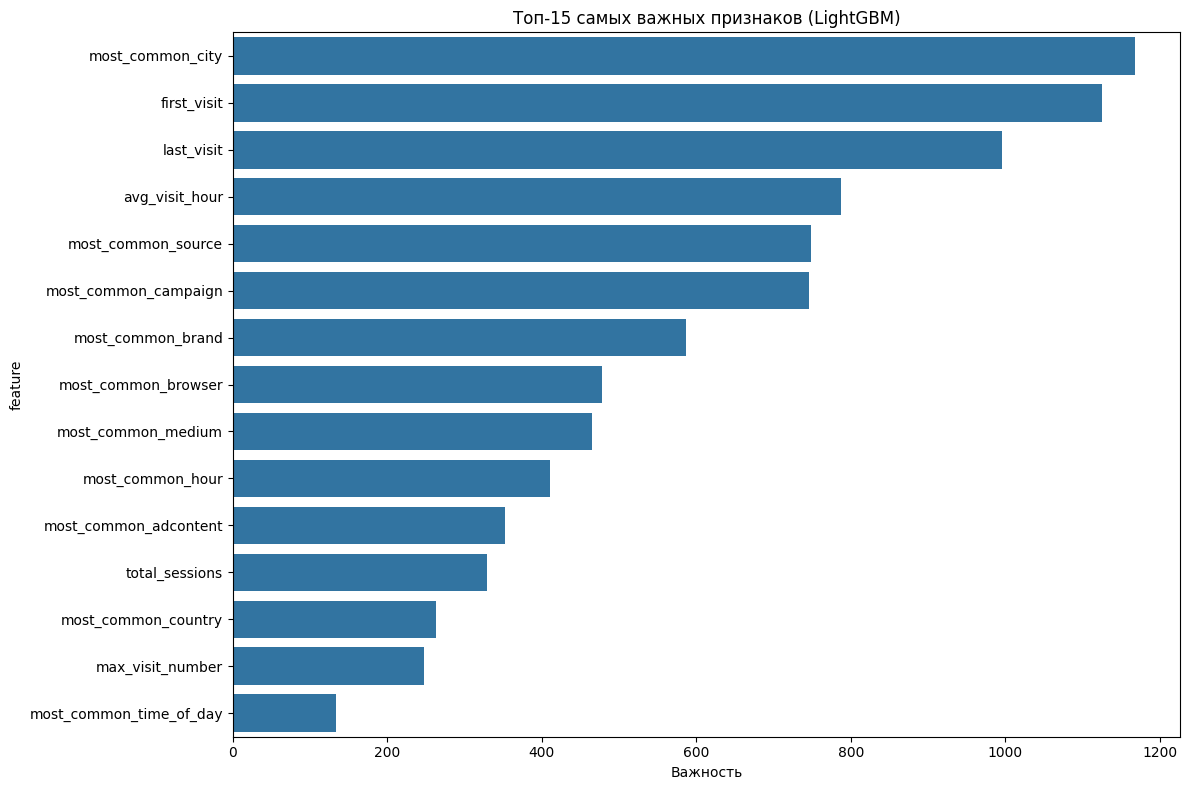

In [38]:
plt.figure(figsize=(12, 8))
sns.barplot(data=importance_df_final.head(15), x='importance', y='feature')
plt.title('Топ-15 самых важных признаков (LightGBM)')
plt.xlabel('Важность')
plt.tight_layout()
plt.show()

<span style="font-family: 'Times New Roman', serif; font-size: 20px;">

попробуем бороться с дисбалансом с помощью imblearn в часности метода SMOTENС для генерации семантически похожих признаков минорного класса


из за большой размерности данных зададим минорный класс равнай 30% от противоположного класса для избежания ошибки по памяти
</span>

In [39]:
smote_nc = SMOTENC(
    categorical_features=categorical_columns,
    random_state=42,
    sampling_strategy=0.3,
    k_neighbors=3
)

In [40]:
X_resampled, y_resampled = smote_nc.fit_resample(X_temp, y_temp)

In [45]:
y_resampled.value_counts()

0    509730
1    152919
Name: has_converted, dtype: int64

In [71]:
lgbm = LGBMClassifier(
    **best_params,
    random_state=42
    )

lgbm.fit(
    X_resampled, y_resampled
)

# Предсказания
y_pred = lgbm.predict(X_temp)
y_pred_proba = lgbm.predict_proba(X_test)[:, 1]

# Оценка качества
print("=== БАЗОВАЯ МОДЕЛЬ ===")
print(f"ROC-AUC: {roc_auc_score(y_test, y_pred_proba):.4f}")

=== БАЗОВАЯ МОДЕЛЬ ===
ROC-AUC: 0.7210


<span style="font-family: 'Times New Roman', serif; font-size: 20px;">

рассмотрим, как изменяются ключевые метрики модели (precision, recall, F1-score) при изменении порога классификации, и определим оптимальный порог, обеспечивающий наиболее сбалансированную работу модели с учётом приоритетов заказчика и требований к качеству прогнозов и рузультату предсказаний.
</span>

In [56]:
def find_optimal_threshold(y_true, y_proba, min_precision=0.5):
    
    precision, recall, thresholds = precision_recall_curve(y_true, y_proba)
    fpr, tpr, thresholds_roc = roc_curve(y_true, y_proba)
    roc_auc = auc(fpr, tpr)
    
    f1_scores = []
    for i in range(len(thresholds)):
        f1 = 2 * precision[i] * recall[i] / (precision[i] + recall[i]) if (precision[i] + recall[i]) > 0 else 0
        f1_scores.append(f1)
    
    positive_rates = []
    for threshold in thresholds:
        y_pred = (y_proba >= threshold).astype(int)
        positive_rates.append(y_pred.mean())
    
    optimal_idx_by_precision = 0
    for i in range(len(thresholds)):
        if precision[i] >= min_precision:
            optimal_idx_by_precision = i
            break
    
    optimal_idx_by_f1 = np.argmax(f1_scores)
    
    optimal_threshold_precision = thresholds[optimal_idx_by_precision]
    optimal_threshold_f1 = thresholds[optimal_idx_by_f1]
    
    # Визуализация
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))
    
    ax1.plot(thresholds, precision[:-1], 'b-', label='Precision', linewidth=2)
    ax1.plot(thresholds, recall[:-1], 'r-', label='Recall', linewidth=2)
    ax1.plot(thresholds, f1_scores, 'g-', label='F1-Score', linewidth=2)
    ax1.axvline(optimal_threshold_precision, color='k', linestyle='--', 
                label=f'Precision threshold: {optimal_threshold_precision:.3f}')
    ax1.axvline(optimal_threshold_f1, color='purple', linestyle='--', 
                label=f'F1 threshold: {optimal_threshold_f1:.3f}')
    ax1.set_xlabel('Threshold')
    ax1.set_ylabel('Score')
    ax1.set_title('Precision, Recall and F1-Score vs Threshold')
    ax1.legend()
    ax1.grid(alpha=0.3)
    
    ax2.plot(recall, precision, 'b-', linewidth=2, label='PR Curve')
    
    f1_levels = [0.3, 0.5, 0.7, 0.9]
    for f1 in f1_levels:
        if f1 <= 1.0:
            r_values = np.linspace(0.01, 0.99, 100)
            p_values = [(f1 * r) / (2 * r - f1) for r in r_values if (2 * r - f1) > 0]
            r_values = [r for r, p in zip(r_values, p_values) if p <= 1.0 and p >= 0]
            p_values = [p for p in p_values if p <= 1.0 and p >= 0]
            if len(p_values) > 0:
                ax2.plot(r_values, p_values, '--', alpha=0.5, label=f'F1 = {f1}')
    
    ax2.plot(recall[optimal_idx_by_precision], precision[optimal_idx_by_precision], 
             'ro', markersize=8, label=f'Precision opt (F1={f1_scores[optimal_idx_by_precision]:.3f})')
    ax2.plot(recall[optimal_idx_by_f1], precision[optimal_idx_by_f1], 
             'go', markersize=8, label=f'F1 opt (F1={f1_scores[optimal_idx_by_f1]:.3f})')
    
    ax2.set_xlabel('Recall')
    ax2.set_ylabel('Precision')
    ax2.set_title('Precision-Recall Curve with F1 Isolines')
    ax2.legend()
    ax2.grid(alpha=0.3)
    
    ax3.plot(fpr, tpr, 'b-', linewidth=2, label=f'ROC curve (AUC = {roc_auc:.3f})')
    ax3.plot([0, 1], [0, 1], 'k--', alpha=0.5, label='Random classifier')
    

    idx_precision_roc = np.argmin(np.abs(thresholds_roc - optimal_threshold_precision))
    idx_f1_roc = np.argmin(np.abs(thresholds_roc - optimal_threshold_f1))
    
    ax3.plot(fpr[idx_precision_roc], tpr[idx_precision_roc], 'ro', markersize=8, 
             label=f'Precision opt (FPR={fpr[idx_precision_roc]:.3f})')
    ax3.plot(fpr[idx_f1_roc], tpr[idx_f1_roc], 'go', markersize=8, 
             label=f'F1 opt (FPR={fpr[idx_f1_roc]:.3f})')
    
    ax3.set_xlabel('False Positive Rate')
    ax3.set_ylabel('True Positive Rate')
    ax3.set_title('ROC Curve')
    ax3.legend()
    ax3.grid(alpha=0.3)
    
    ax4.plot(thresholds, positive_rates, 'm-', linewidth=2, label='Positive Rate')
    ax4.axvline(optimal_threshold_precision, color='k', linestyle='--', 
                label=f'Precision threshold: {optimal_threshold_precision:.3f}')
    ax4.axvline(optimal_threshold_f1, color='purple', linestyle='--', 
                label=f'F1 threshold: {optimal_threshold_f1:.3f}')
    
    actual_positive_rate = y_true.mean()
    ax4.axhline(actual_positive_rate, color='orange', linestyle='--', 
                label=f'Actual positive rate: {actual_positive_rate:.3f}')
    
    ax4.set_xlabel('Threshold')
    ax4.set_ylabel('Positive Rate')
    ax4.set_title('Positive Rate (Доля предсказанных единиц) vs Threshold')
    ax4.legend()
    ax4.grid(alpha=0.3)
    ax4.set_yscale('log')
    
    plt.tight_layout()
    plt.show()

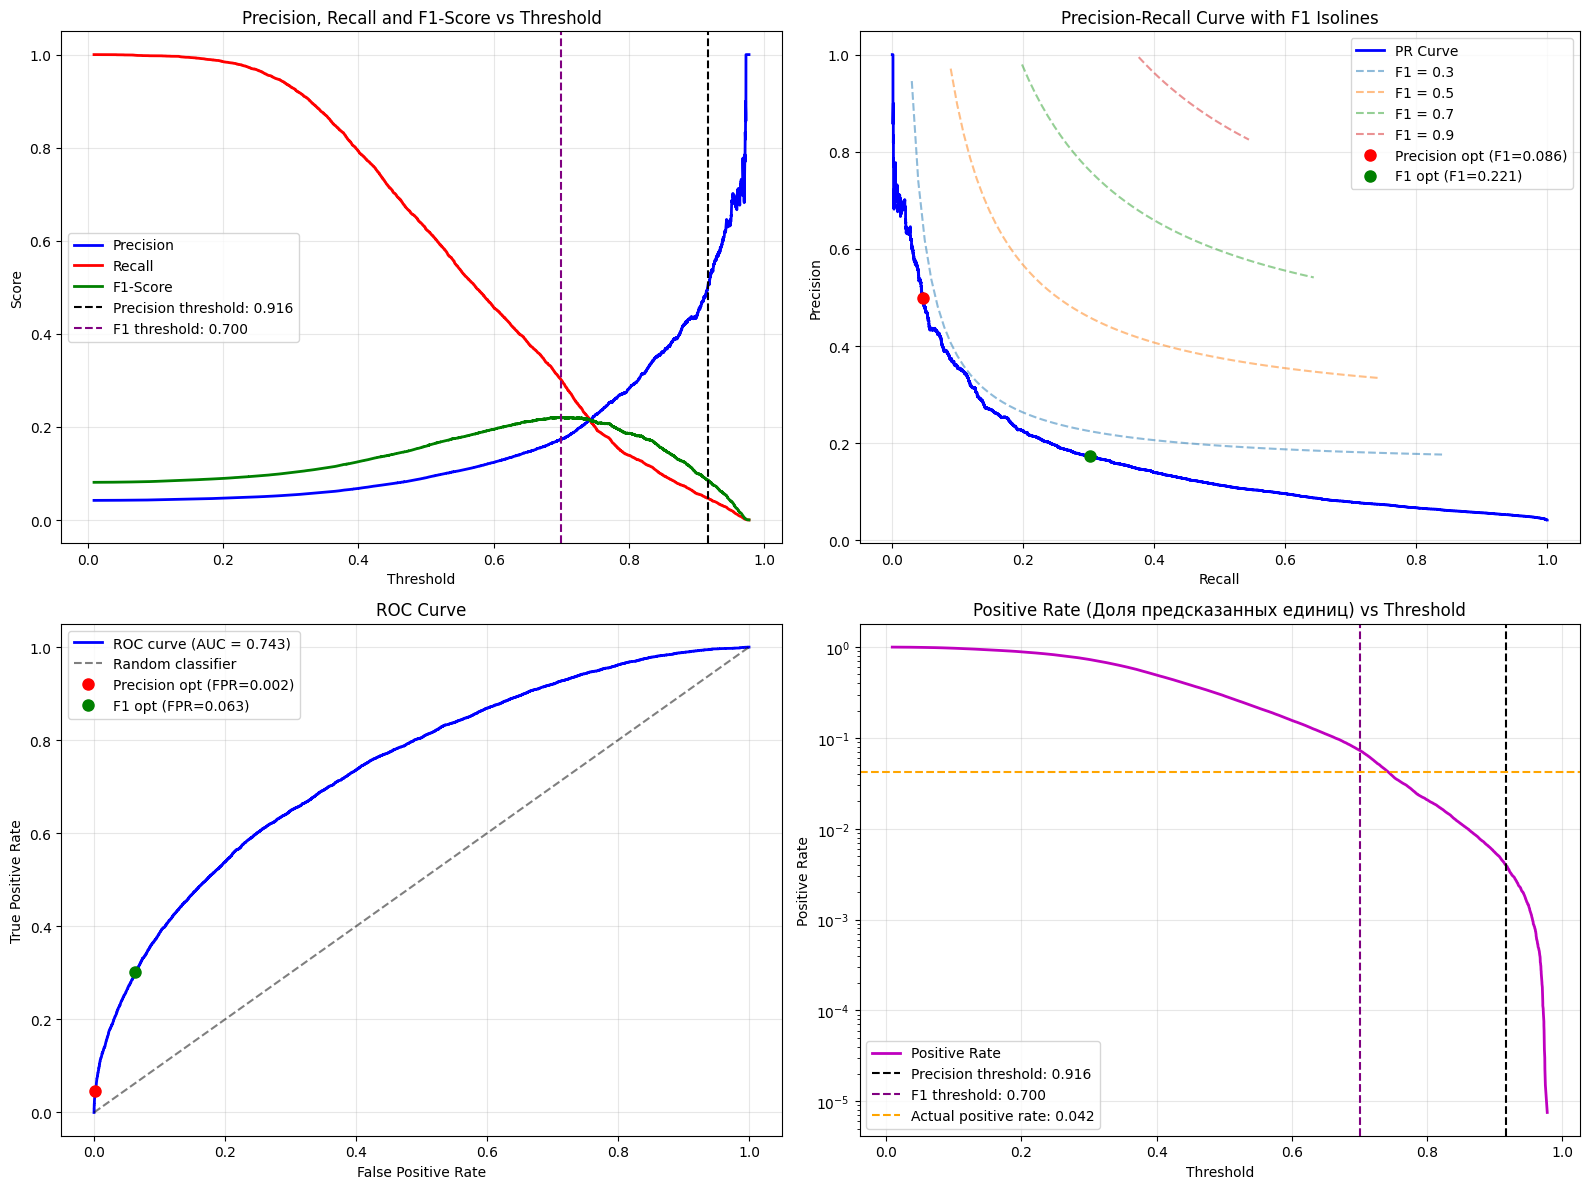

In [58]:
find_optimal_threshold(y_test, y_pred_proba_final)

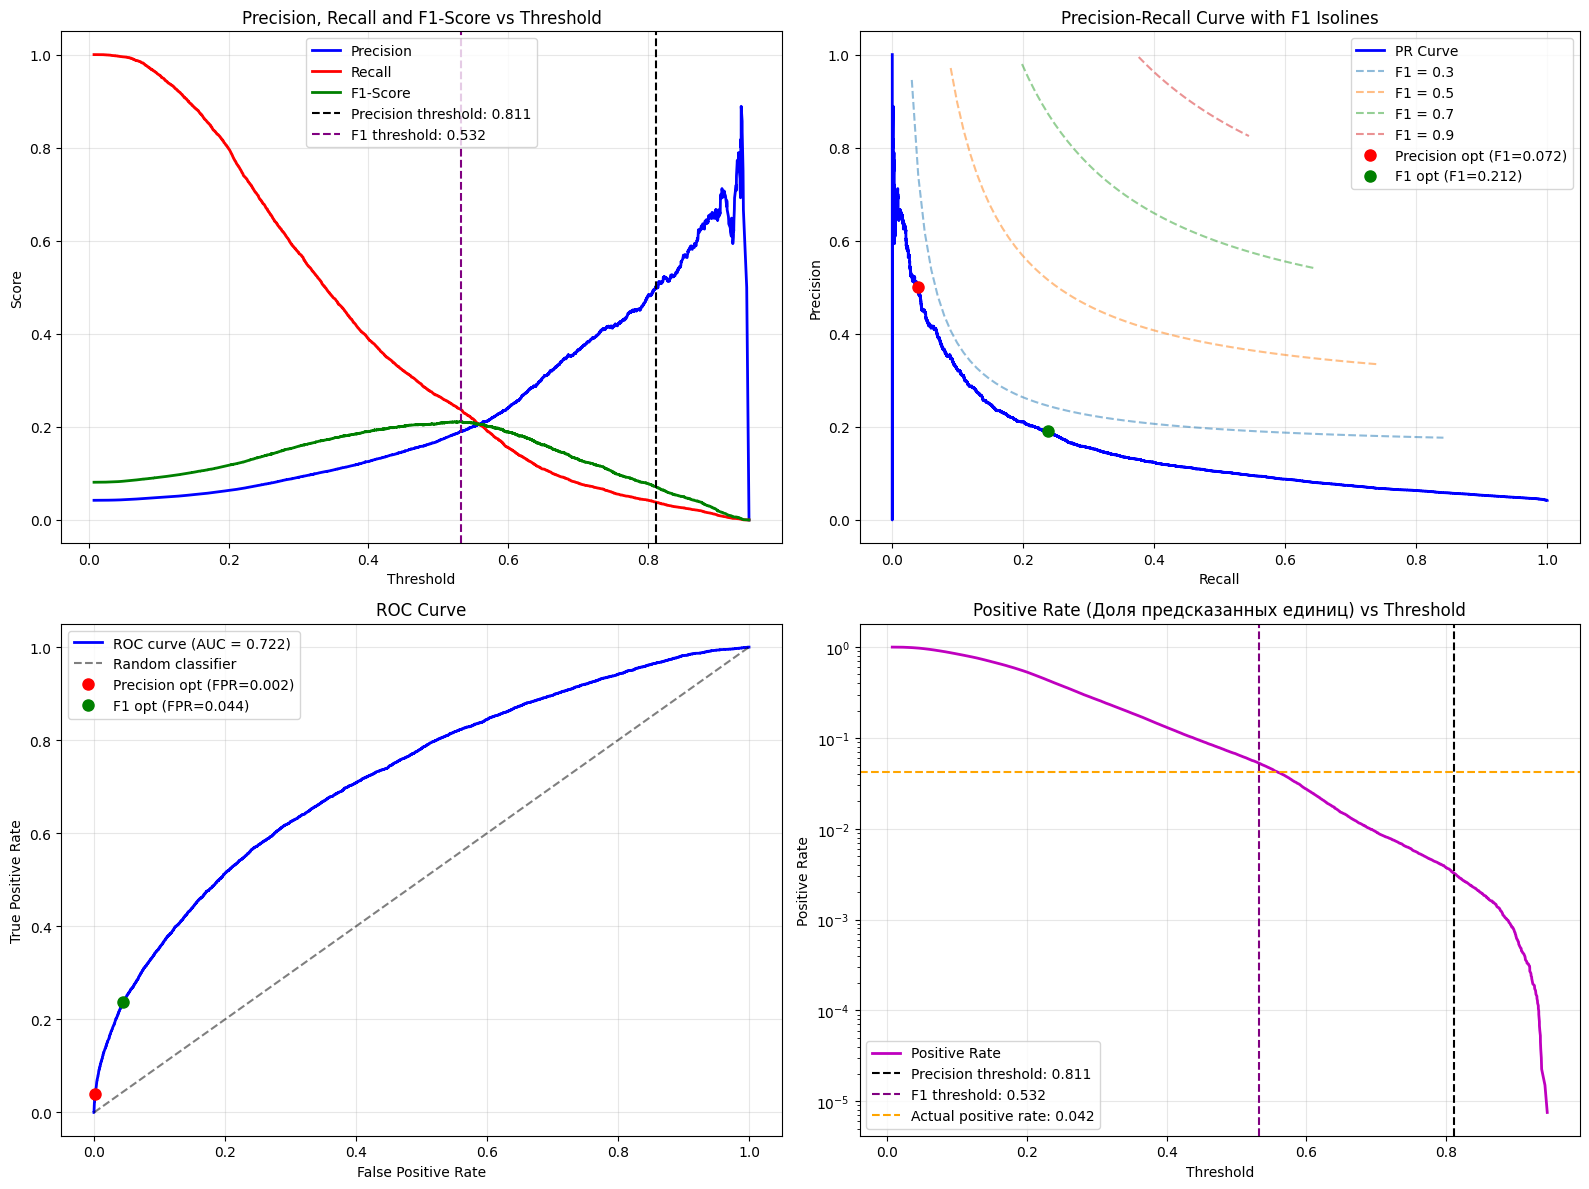

In [57]:
find_optimal_threshold(y_test, y_pred_proba)

<span style="font-family: 'Times New Roman', serif; font-size: 20px;">

Анализ показал, что модель, обученная без использования SMOTE, формирует более выпуклую ROC-кривую и демонстрирует повышенный Positive Rate. Это может указывать на большую разделимость классов на исходных данных, однако подобное поведение нередко обусловлено смещением модели в сторону мажоритарного класса. Следовательно, интерпретация таких результатов требует учёта влияния дисбаланса и осторожного сравнения моделей.

При выборе оптимального порога классификации в качестве критерия часто используют F1-меру, отражающую среднегармоническое между precision и recall. Максимум F1 позволяет определить порог, обеспечивающий наиболее сбалансированное соотношение точности и полноты, что особенно важно в задачах с выраженным дисбалансом классов.

Однако в ситуациях, когда точность (precision) является более критичной, чем полнота (recall), оптимальный порог можно выбирать по максимуму F-B меры, где параметр B (< 1) позволяет увеличивать вес precision. Таким образом, F-B предоставляет более гибкий подход к подбору порога, позволяющий адаптировать модель под конкретные бизнес-приоритеты например, минимизацию ложноположительных срабатываний.
</span>